# Agenda: Plotting

1. Plotting with series
    - Line plots
    - Bar plots
    - Pie plots
    - Box plots
    - Histograms
2. Plotting with a data frame
    - All of the above , plus
    - Scatter plots


# How will we be plotting?

We're going to use Pandas, and its API for plotting, which gives us a nicer layer over Matplotlib. If and when we want, we can pass Matplotlib arguments to our Pandas methods, and those will be passed along.

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
np.random.seed(0)

s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<Axes: >

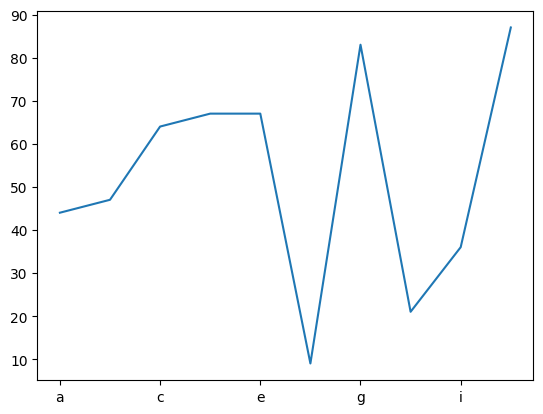

In [4]:
# the easiest way to plot something is with the "plot" method

s.plot()

How did it know what kind of plot to make?

- It took the index (row labels) and used them for the x axis
- It took the values (integers) and used them for the y axis and values
- It assumes that we want to do a "line plot," where it puts the x,y values and then draws lines between them

<Axes: >

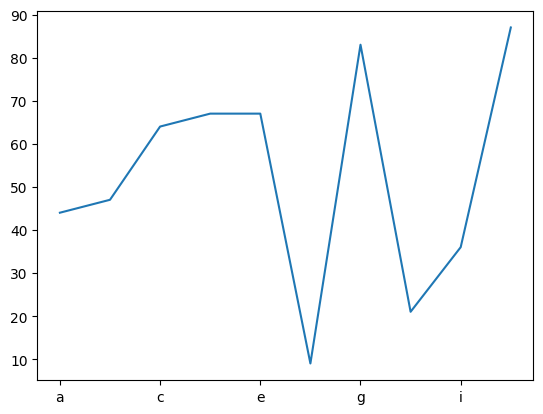

In [5]:
# we can be more explicit about what kind of plot we want, by invoking a method on the "plot" object

s.plot.line()

<Axes: title={'center': 'My amazing plot'}>

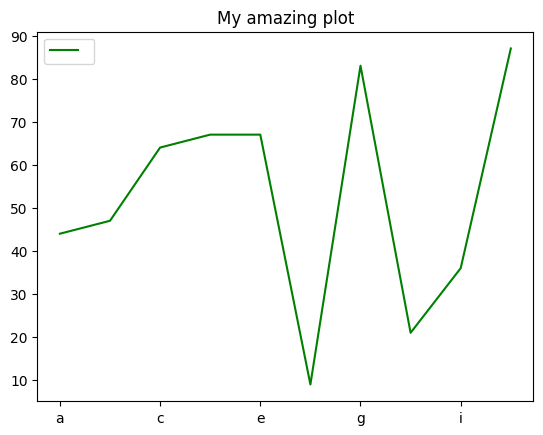

In [6]:
# we can set the title
# and the color and whether we want a legend

s.plot.line(title='My amazing plot', color='green', legend=True)

<Axes: title={'center': 'My amazing plot'}>

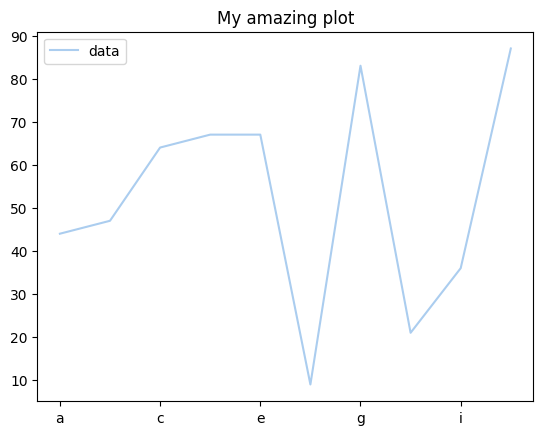

In [10]:
s.name = 'data'
s.plot.line(title='My amazing plot', color='#abcdef', legend=True)

In [11]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.

    This function is useful to plot lines using DataFrame's values
    as coordinates.

    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:

        - A single color string referred to by name, RGB or RGBA code,
            for instance 'red' or '#a98d19'.

        - A sequence of color strings referred to by name, RGB or RGBA
            code, which will be

In [12]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: title={'center': 'My amazing plot'}>

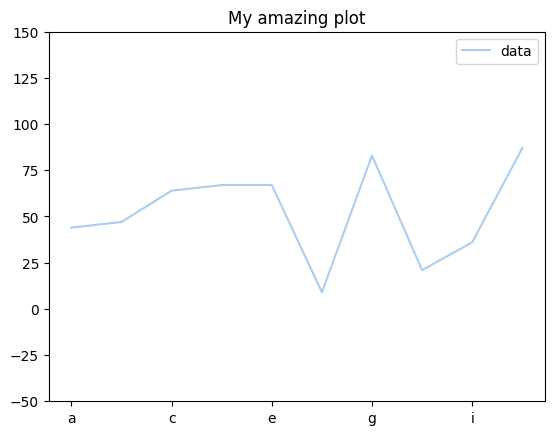

In [13]:
s.plot.line(title='My amazing plot', color='#abcdef', legend=True, ylim=(-50, 150))

<Axes: >

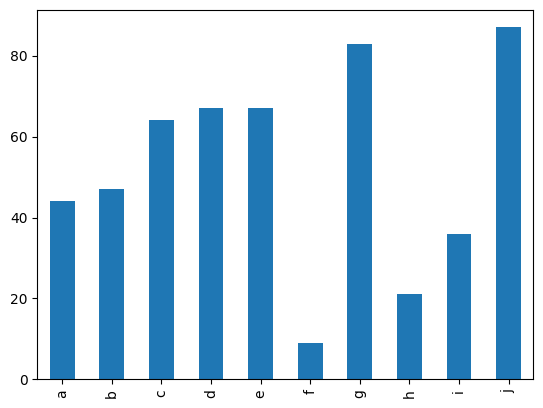

In [14]:
# what about bar plots?

s.plot.bar()


<Axes: title={'center': 'My amazing plot'}>

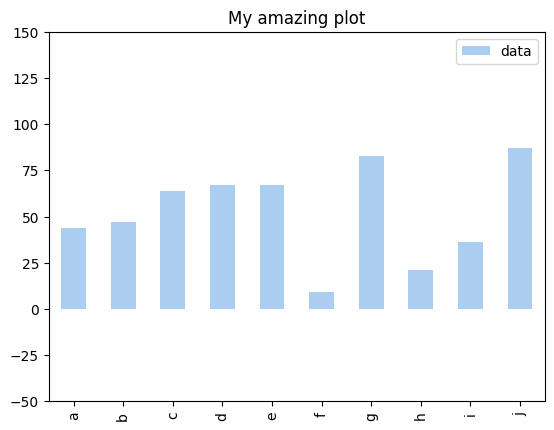

In [15]:
s.plot.bar(title='My amazing plot', color='#abcdef', legend=True, ylim=(-50, 150))

# Exercise: Plotting temperature

1. Define a series with 10 elements, integers representing the forecast temperature for the next 10 days. The index should reflect the dates in MMDD format.
2. Create a line plot from that data (get it from the Web). Set the y limits to be lower and higher than any normal temperature should be.
3. Create a bar plot with that data, setting the title and color.


In [16]:
s = Series([35, 34, 33, 33, 34, 35, 35, 34, 34, 34],
           index='0808 0809 0810 0811 0812 0813 0814 0815 0816 0817'.split())
s

0808    35
0809    34
0810    33
0811    33
0812    34
0813    35
0814    35
0815    34
0816    34
0817    34
dtype: int64

<Axes: >

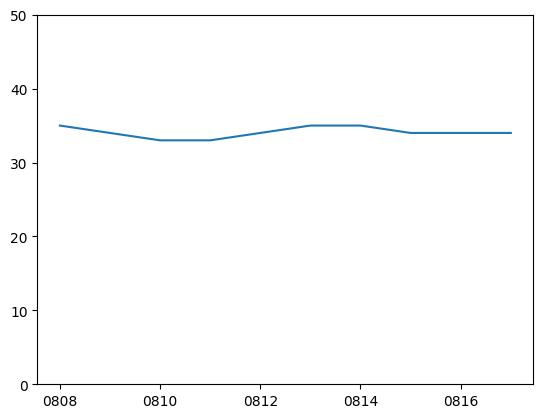

In [17]:
s.plot.line(ylim=(0, 50))

<Axes: title={'center': 'high temps'}>

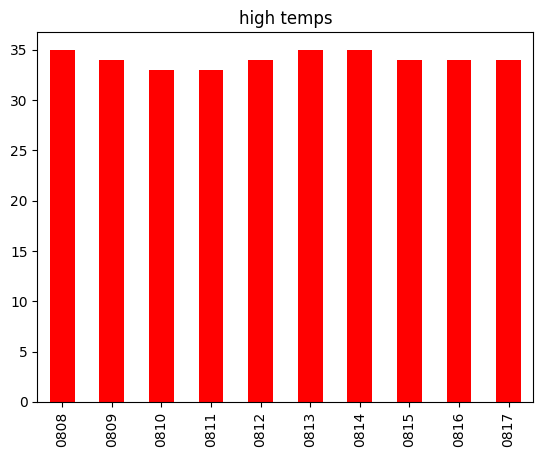

In [18]:
s.plot.bar(title='high temps', color='red')

# Pie charts / pie plots

We have a bunch of figures, and we want to know what proportion each value consumes from the whole.

Be sure that you know what you're doing when you ask for a pie chart! 

<Axes: >

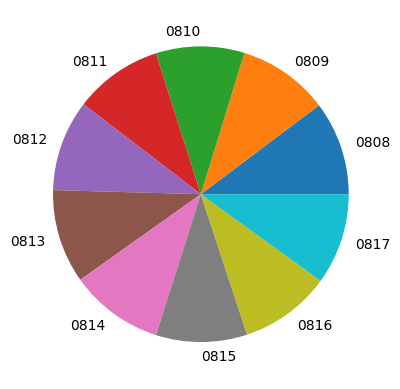

In [19]:
# Bad example:  let's make a pie chart from the temperatures!

s.plot.pie()

In [20]:
# I might, however, want to know, how often each temperature is appearing
# and then plot that as a pie chart

# how can I turn my temps into a frequency listing? 
# value_counts

s.value_counts()

34    5
35    3
33    2
Name: count, dtype: int64

<Axes: ylabel='count'>

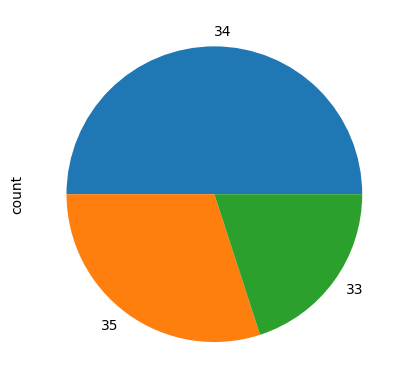

In [21]:
s.value_counts().plot.pie()

<Axes: >

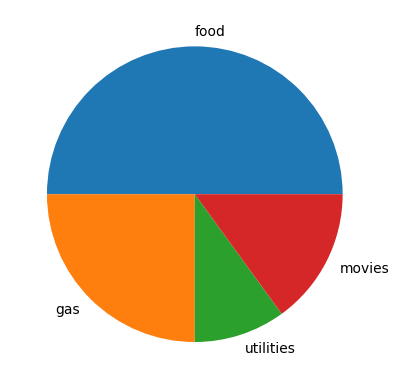

In [22]:
s = Series([50, 25, 10, 15], 
           index=['food', 'gas', 'utilities', 'movies'])
s.plot.pie()

<Axes: ylabel='Frequency'>

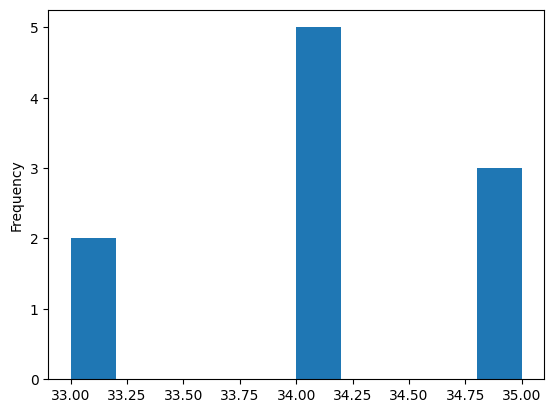

In [23]:
# another way to visualize the frequency distribution is with a histogram

s = Series([35, 34, 33, 33, 34, 35, 35, 34, 34, 34],
           index='0808 0809 0810 0811 0812 0813 0814 0815 0816 0817'.split())

s.plot.hist()

<Axes: ylabel='Frequency'>

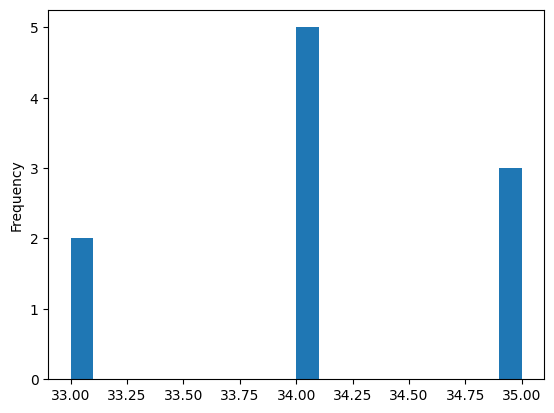

In [24]:
# what if I want a smaller/larger number of bins?
# just pass bins=n (for whatever value you want) to plot.hist

s.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

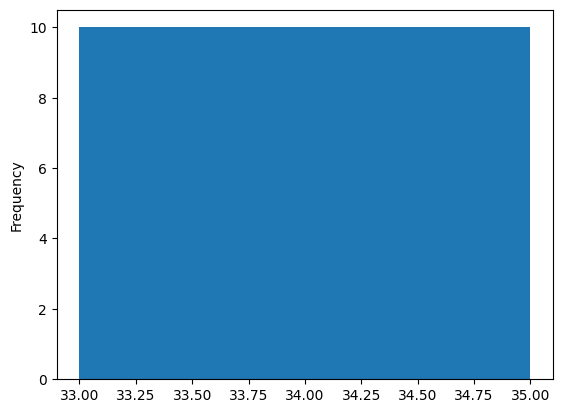

In [25]:
s.plot.hist(bins=1)

In [26]:
# if you're doing a pie plot, you will probably want to use value_counts first
# if you're doing a histogram, it effectively does the value_counts for you

# Exercise: Taxi plotting

1. Load the `data/taxi.csv` data file, with 10,000 NYC taxi rides.
2. Create a pie plot showing the distribution of `passenger_count`.
3. Create a pie plot showing how often we have short vs. medium vs. long rides, where short is anything < 1 mile, long is anything > 10 miles, and medium is anything in the middle.
4. Show a histogram of the amounts that people paid.

In [27]:
filename = '../data/taxi.csv'

df = pd.read_csv(filename)

<Axes: ylabel='count'>

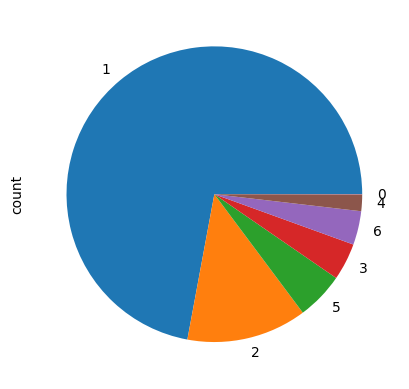

In [29]:
df['passenger_count'].value_counts().plot.pie()

In [30]:
# the "crude" way to do it
df['ride_length'] = 'medium'    # this creates a new column in which *all* values are 'medium'

df.loc[ df['trip_distance'] < 1   # row selector
        ,
        'ride_length'] = 'short'

df.loc[ df['trip_distance'] > 10   # row selector
        ,
        'ride_length'] = 'long'

In [31]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_length
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.00,0.3,17.80,medium
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.00,0.3,8.30,short
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.00,0.3,11.00,short
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.00,0.3,17.16,medium
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30,medium
5,1,2015-06-02 11:19:33,2015-06-02 11:28:48,1,1.40,-73.944641,40.779465,1,N,-73.961365,40.771561,1,8.0,0.0,0.5,1.75,0.00,0.3,10.55,medium
6,1,2015-06-02 11:19:34,2015-06-02 11:38:46,1,1.80,-73.992867,40.748211,1,N,-73.969772,40.748459,1,12.5,0.0,0.5,3.00,0.00,0.3,16.30,medium
7,1,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,-73.863075,40.769253,1,N,-73.986710,40.761307,1,52.5,0.0,0.5,15.00,5.54,0.3,73.84,long
8,2,2015-06-02 11:19:36,2015-06-02 11:45:19,1,1.27,-73.991432,40.749306,1,N,-73.985062,40.759525,2,15.0,0.0,0.5,0.00,0.00,0.3,15.80,medium
9,1,2015-06-02 11:19:38,2015-06-02 11:23:50,1,0.60,-73.970734,40.796207,1,N,-73.977470,40.789509,1,5.0,0.0,0.5,0.50,0.00,0.3,6.30,short


In [32]:
# pd.cut gives us a categorical series based on a numeric series

pd.cut(df['trip_distance'],
       [-1, 1, 10, 100000],
       labels=['short', 'medium', 'long'])
       

0       medium
1        short
2        short
3       medium
4       medium
         ...  
9994    medium
9995    medium
9996    medium
9997    medium
9998    medium
Name: trip_distance, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

<Axes: ylabel='count'>

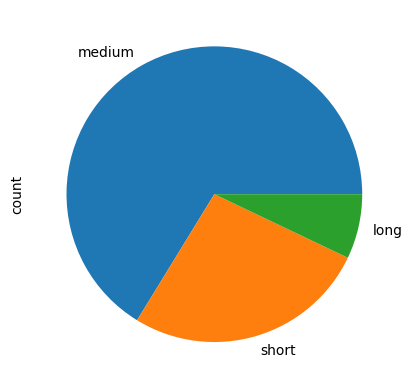

In [36]:
pd.cut(df['trip_distance'],
       [-1, 1, 10, 100000],
       labels=['short', 'medium', 'long']).value_counts().plot.pie()

<Axes: ylabel='Frequency'>

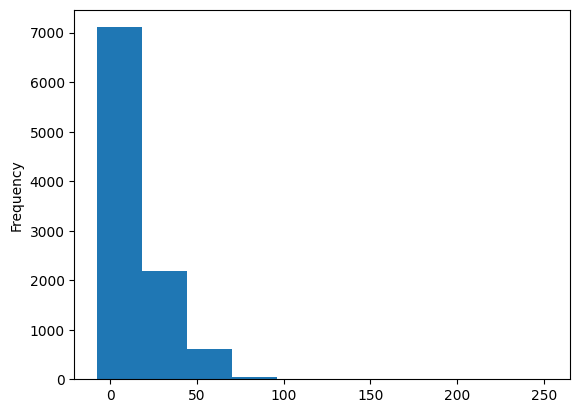

In [37]:
df['total_amount'].plot.hist()

# Box plots (box and whisker plots)

We often use the `describe` method to get a summary of the data in a series. A boxplot is a visual version of `describe`. 

What we get is a visualization of the limits of our data, as well as the distribution internally -- it shows the 25% and 75% marks, as well as the median.

<Axes: >

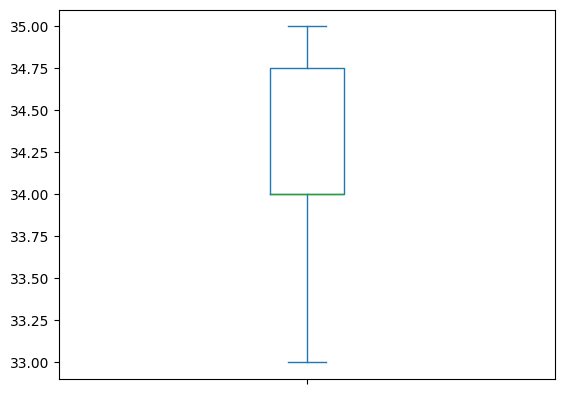

In [39]:
s.plot.box()

In [40]:
s

0808    35
0809    34
0810    33
0811    33
0812    34
0813    35
0814    35
0815    34
0816    34
0817    34
dtype: int64

<Axes: >

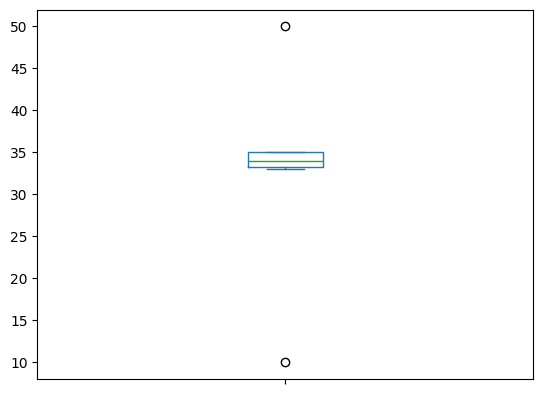

In [41]:
s.loc['0812'] = 10
s.loc['0816'] = 50

s.plot.box()


In [42]:
# outliers (the circles) are, in our version, anywhere that a data point is 2*IQR below or above the median.
# IQR == interquartile range, meaning the 75% value - 25% value


# Data frames and visualization

We've already seen that just about any method that we can run on a series, we can also run on a data frame. We'll get one result per column, because each column is a series.

The same is true for visualization -- we can create the same sorts of plots on data frames as we did with series, but we'll get one line/color/plot for each column.

In [43]:
df = DataFrame({'hi': [34, 33, 33, 34, 35, 34, 35, 34, 34, 35],
                'lo': [23, 23, 24, 24, 23, 23, 24, 24, 24, 25]},
               index='0808 0809 0810 0811 0812 0813 0814 0815 0816 0817'.split())
df

,hi,lo
0808,34,23
0809,33,23
0810,33,24
0811,34,24
0812,35,23
0813,34,23
0814,35,24
0815,34,24
0816,34,24
0817,35,25


<Axes: >

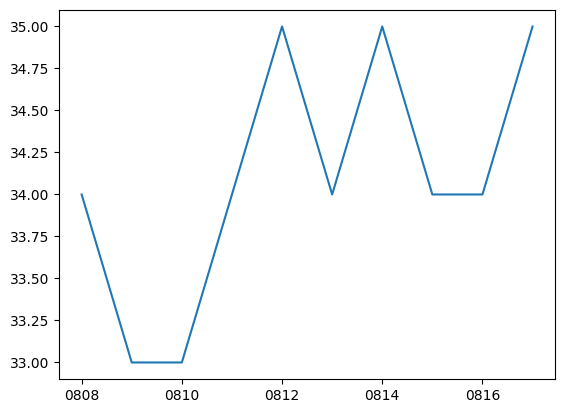

In [44]:
df['hi'].plot.line()

<Axes: >

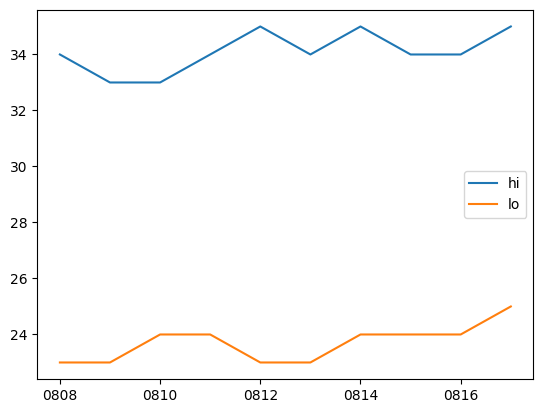

In [45]:
df.plot.line()

<Axes: title={'center': 'Temperatures'}>

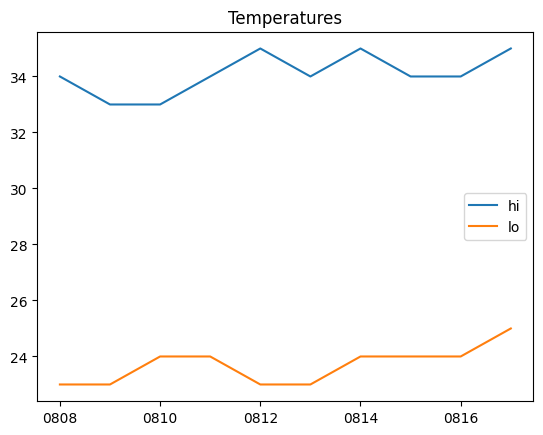

In [46]:
df.plot.line(title='Temperatures')

<Axes: title={'center': 'Temperatures'}>

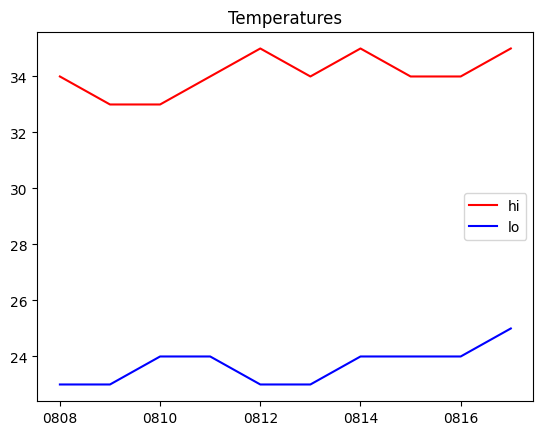

In [47]:
df.plot.line(title='Temperatures', color=['red', 'blue'])

array([<Axes: >, <Axes: >], dtype=object)

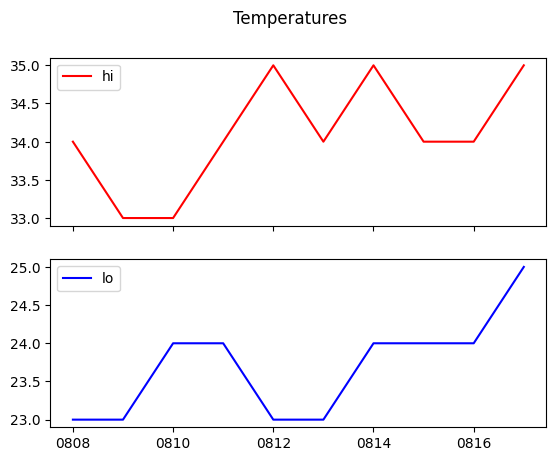

In [48]:
# what if I actually want two separate plots, one for each of the columns?

df.plot.line(title='Temperatures', color=['red', 'blue'], subplots=True)

<Axes: >

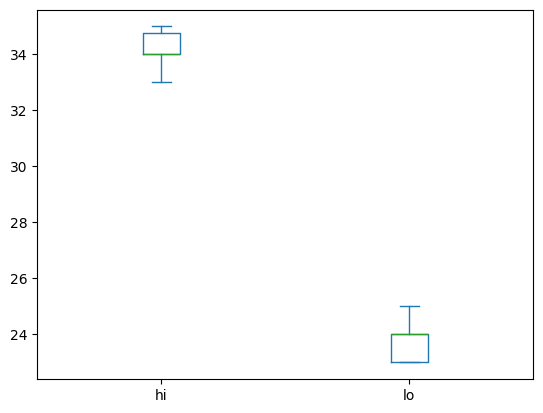

In [49]:
df.plot.box()

hi       Axes(0.125,0.11;0.352273x0.77)
lo    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

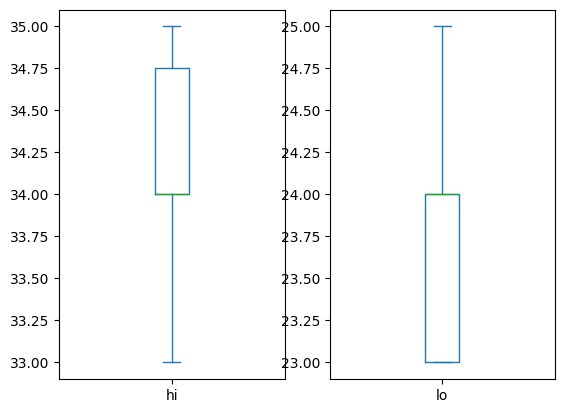

In [50]:
df.plot.box(subplots=True)

<Axes: >

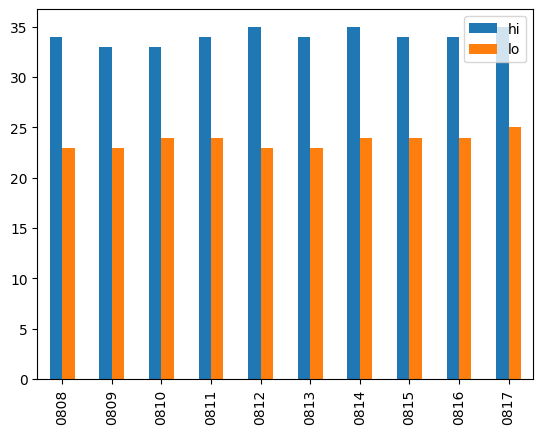

In [51]:
df.plot.bar()

<Axes: >

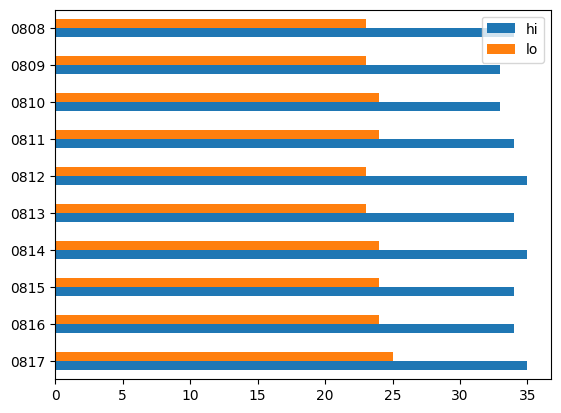

In [54]:
# a slight variation on bar plots is barh plots, where they are horizontal

df.sort_index(ascending=False).plot.barh()

In [55]:
df

,hi,lo
0808,34,23
0809,33,23
0810,33,24
0811,34,24
0812,35,23
0813,34,23
0814,35,24
0815,34,24
0816,34,24
0817,35,25


In [56]:
# what if, for each temperature we have an additional factor showing the heat/misery?

df['misery'] = [5, 6, 7, 3, 4, 5, 1,2,3, 4]

In [57]:
df

,hi,lo,misery
0808,34,23,5
0809,33,23,6
0810,33,24,7
0811,34,24,3
0812,35,23,4
0813,34,23,5
0814,35,24,1
0815,34,24,2
0816,34,24,3
0817,35,25,4


<Axes: >

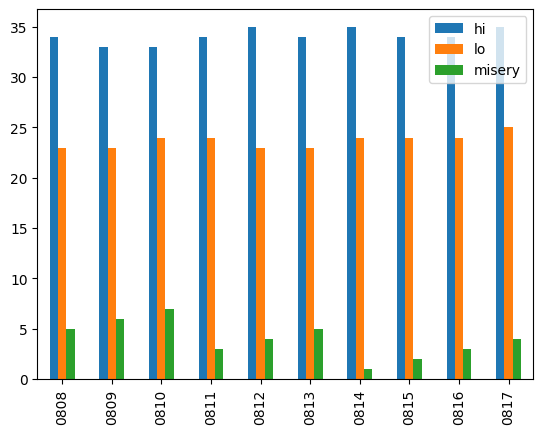

In [58]:
df.plot.bar()

<Axes: >

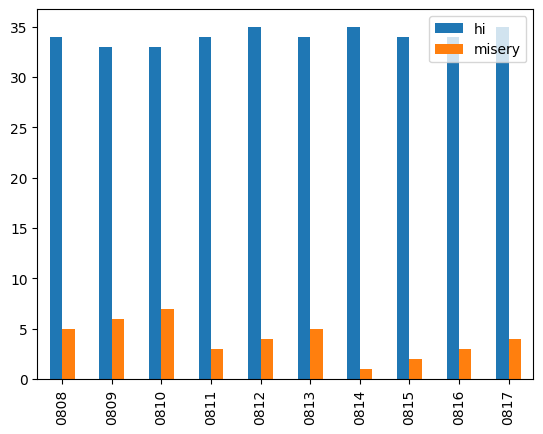

In [60]:
# I want to see the high temp and the misery temp

df[['hi', 'misery']].plot.bar()

<Axes: >

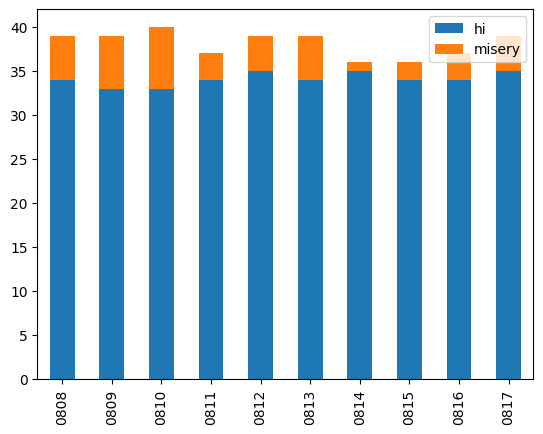

In [61]:
# what if I want to add these together, to see one bar, but to have them combine hi+misery

df[['hi', 'misery']].plot.bar(stacked=True)

<Axes: ylabel='count'>

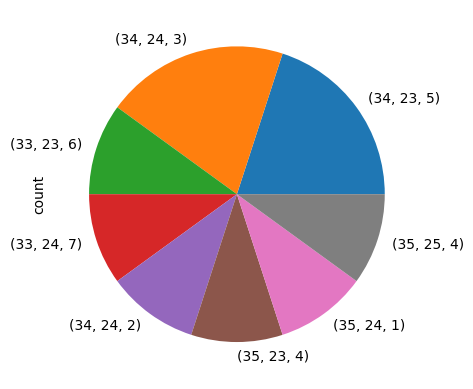

In [63]:
# can we do pie plots on a data frame?

df.value_counts().plot.pie()

<Axes: ylabel='Frequency'>

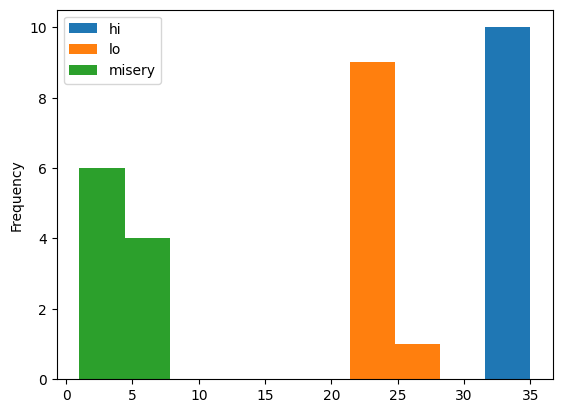

In [64]:
# what about histograms?

df.plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

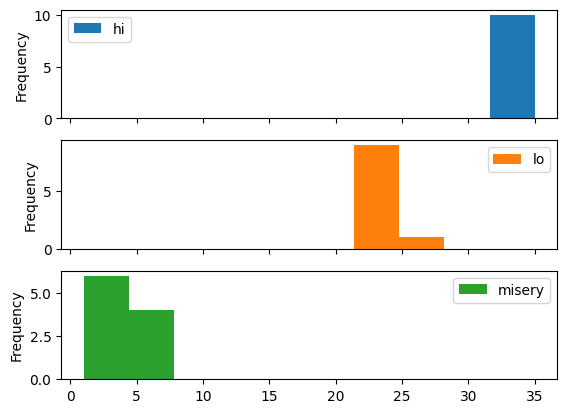

In [65]:
df.plot.hist(subplots=True)

# Exercises: Data frame plotting (on taxi data)

1. Show a histogram for both `trip_distance` and `total_amount`. Try with and without subplots, to see what happens.
2. Grab the first 200 rows from both `trip_distance` and `total_amount`, and show a line plot with both of those on the same axes.
3. Create boxplots from `passenger_count`, `trip_distance`, and `total_amount`; would subplots help here?
4. Grab the first 10 rows from the data frame, and create a stacked bar plot showing the components that go into a taxi fare ('fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge' )

In [67]:
df = pd.read_csv('../data/taxi.csv')
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

<Axes: ylabel='Frequency'>

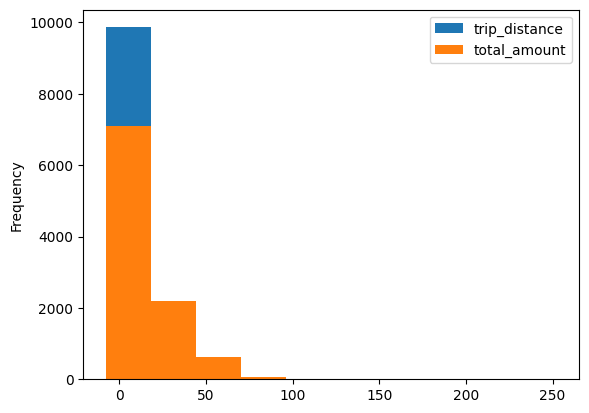

In [69]:
df[['trip_distance', 'total_amount']].plot.hist()

<Axes: ylabel='Frequency'>

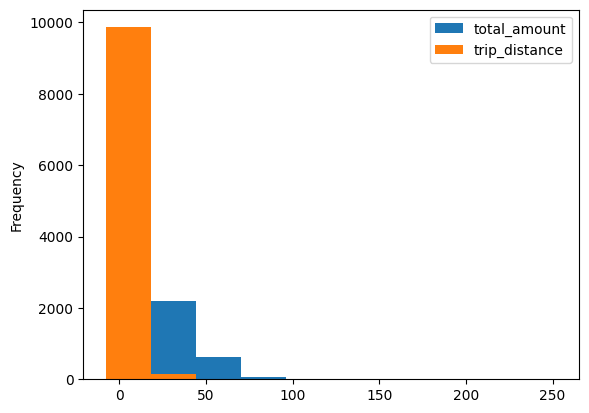

In [70]:
df[['total_amount', 'trip_distance']].plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

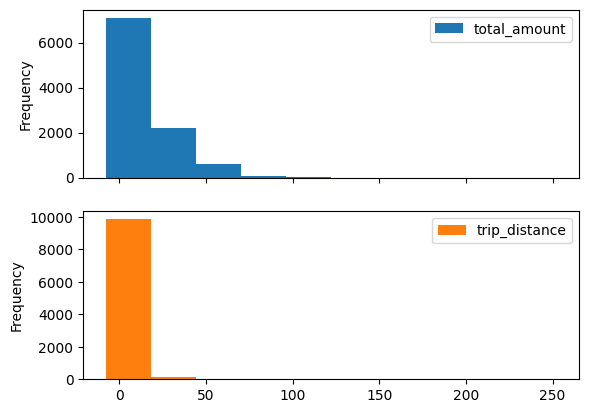

In [71]:
df[['total_amount', 'trip_distance']].plot.hist(subplots=True)

<Axes: >

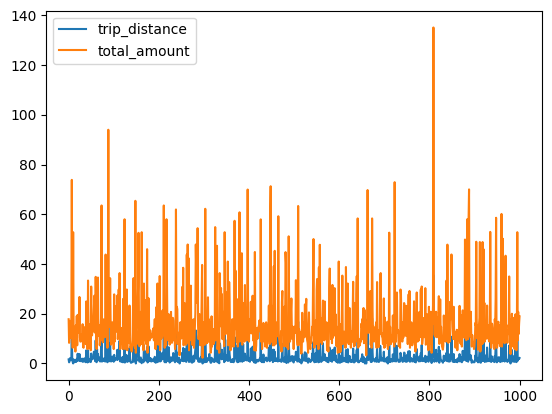

In [75]:
df.loc[:1000,
    ['trip_distance', 'total_amount']
   ].plot.line()

passenger_count       Axes(0.125,0.11;0.227941x0.77)
total_amount       Axes(0.398529,0.11;0.227941x0.77)
trip_distance      Axes(0.672059,0.11;0.227941x0.77)
dtype: object

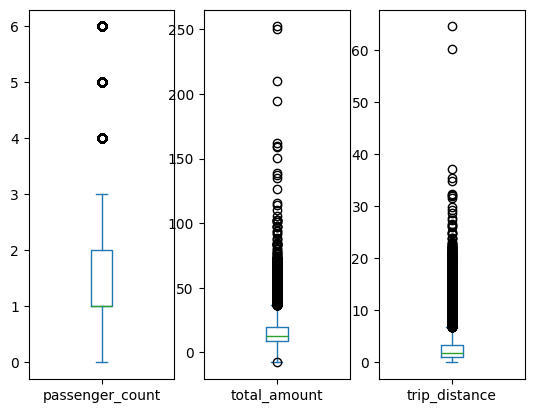

In [78]:
df[['passenger_count', 'total_amount', 'trip_distance']].plot.box(subplots=True)

<Axes: >

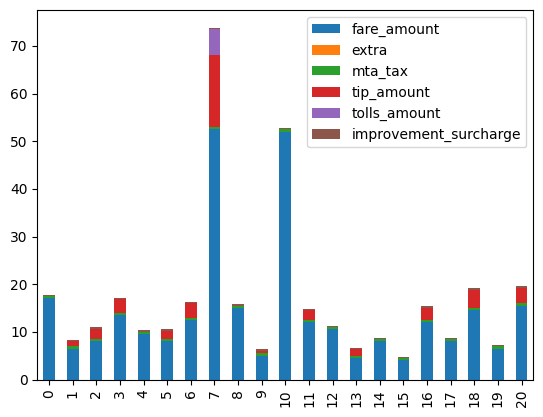

In [81]:
df.loc[
    :20,
    ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
].plot.bar(stacked=True)

# Scatter plots

When we want to see the relationship between two numeric columns, we can use a scatter plot:

- Which column will be `x` axis
- Which column will be the `y` axis

<Axes: xlabel='trip_distance', ylabel='total_amount'>

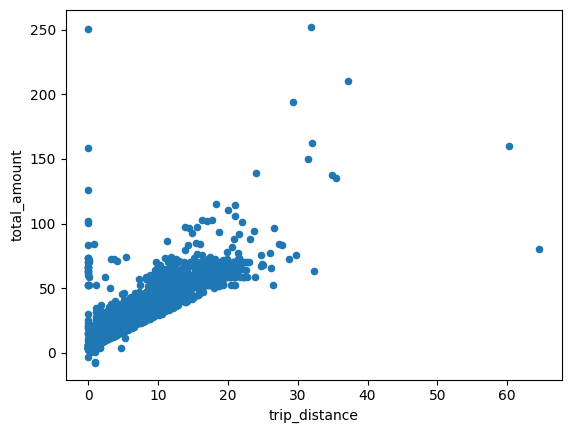

In [82]:
df.plot.scatter(x='trip_distance', y='total_amount')

<Axes: xlabel='trip_distance', ylabel='passenger_count'>

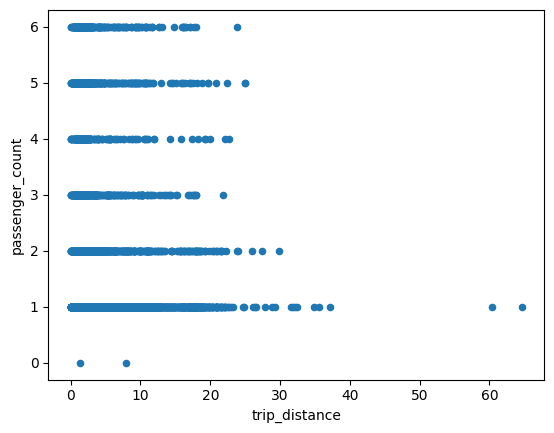

In [83]:
df.plot.scatter(x='trip_distance', y='passenger_count')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

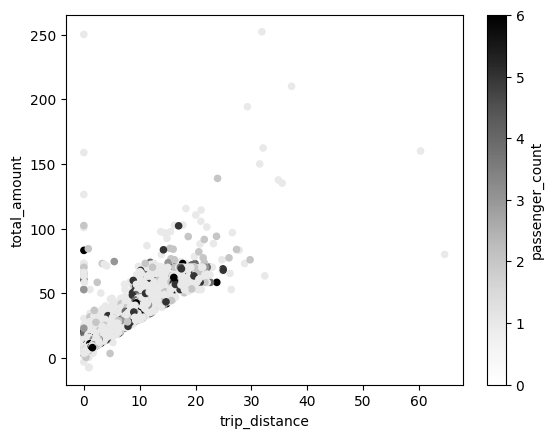

In [84]:
# we can add another keyword argument, c -- the column we should use
# to determine the color of the dot

df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')

In [ ]:
# we can ask Pa

df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')